In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations, permutations
from thefuzz import fuzz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from alpaca_proteomics.spits import tools

In [235]:
con = ['Treatment_', 'Control_', 'deltaX_', 'deltaY_', 'GFP_', 'Condition_', 'KatA_'] 
letter = ['A_', 'B_', 'C_', '',]
instrument = ['QExactive_', 'Orbitrap_', 'Fusion_', 'TimsTof_', '']
sorting = ['FACS_', 'sorted_', 'FACSsort_', '']
n_cells = ['1E6_', '5E6_', '5E5_', '']
digestion = ['FASP_', 'STrap_', 'InSol_', 'InGel_', 'LiMPS_', '']
project = ['PR001_', 'PR010_', 'PR002_', 'PR012_', '']
sample_type = ['Plasma_', 'Tissue_', 'Supernatant_', 'Nuclei_', '']

name_dict = {'Condition':con, 
             'Letter':letter, 
             'Sorting':sorting,
             'MS':instrument, 
             'Cell Number':n_cells, 
             'Digestion Method':digestion,
             'Project Name':project,
            'Sample Type': sample_type}

In [452]:
# 1 naming parameters
summary = []
for a in name_dict:
    sample_generator = [f"Intensity {''.join([x])}" 
                        for x in name_dict[a]]
    mean_distance = [fuzz.ratio(x,y) for x, y in permutations(sample_generator, 2)]
    lw_distance = f"{np.round(np.mean(mean_distance),1)} ± {np.round(np.std(mean_distance),1)}"
    sample_test = {'Intensity' : [f'{i}{n}' for i in sample_generator for n in range(1,6)]}
    candidates = in_polish_please(sample_test, 'Intensity') # Function 1
    export = in_the_darkness_bind_them(candidates)          # Function 2

    n_condition = len(candidates)/5
    correct = len([i for i in export if len(i) == 5]) / (len(candidates)/5) * 100
    summary.append([(a), n_condition, lw_distance, correct])

for slice_size in range(5, 100, 5):

# 2 naming parameters
    try:
        for a, b in permutations(name_dict, 2):

            possibilities = [f"Intensity {''.join([x, y])}" 
                                for x in name_dict[a] for y in name_dict[b]]

            generator = np.array_split(possibilities, len(possibilities)/slice_size)

            for sample_generator in generator:            
                mean_distance = [fuzz.ratio(x,y) for x, y in combinations(sample_generator, 2)]
                lw_distance = f"{np.round(np.mean(mean_distance),1)} ± {np.round(np.std(mean_distance),1)}"
                sample_test = {'Intensity' : [f'{i}{n}' for i in sample_generator for n in range(1,6)]}
                candidates = in_polish_please(sample_test, 'Intensity')  # Function 1
                export = in_the_darkness_bind_them(candidates) # Function 2

                n_condition = len(candidates)/5
                correct = len([i for i in export if len(i) == 5]) / (len(candidates)/5) * 100
                summary.append([(a, b), n_condition, lw_distance, correct])
    except:
        print(f'Cannot do slices of {slice_size} in combinations of {len((a, b))} parameters')

# 3 naming parameters
    try:
        for a, b, c in permutations(name_dict, 3):
            possibilities = [f"Intensity {''.join([x, y, z])}" 
                                for x in name_dict[a] for y in name_dict[b] for z in name_dict[c]]

            generator = np.array_split(possibilities, len(possibilities)/slice_size)

            for sample_generator in generator:
                mean_distance = [fuzz.ratio(x,y) for x, y in combinations(sample_generator, 2)]
                lw_distance = f"{np.round(np.mean(mean_distance),1)} ± {np.round(np.std(mean_distance),1)}"
                sample_test = {'Intensity' : [f'{i}{n}' for i in sample_generator for n in range(1,6) if i != '']}
                candidates = in_polish_please(sample_test, 'Intensity') # Function 1
                export = in_the_darkness_bind_them(candidates) # Function 2

                n_condition = len(candidates)/5
                correct = len([i for i in export if len(i) == 5]) / (len(candidates)/5) * 100
                summary.append([(a, b, c), n_condition, lw_distance, correct])

    except:
            print(f'Cannot do slices of {slice_size} in combinations of {len((a, b, c))} parameters')

# 4 naming parameters
    try:
        for a, b, c, d in combinations(name_dict, 4):
            possibilities = [f"Intensity {''.join([x, y, z, w])}" 
                                for x in name_dict[a] for y in name_dict[b] for z in name_dict[c] for w in name_dict[d]]
            generator = np.array_split(possibilities, len(possibilities)/slice_size)

            for sample_generator in generator:
                mean_distance = [fuzz.ratio(x,y) for x, y in combinations(sample_generator, 2)]
                lw_distance = f"{np.round(np.mean(mean_distance),1)} ± {np.round(np.std(mean_distance),1)}"
                sample_test = {'Intensity' : [f'{i}{n}' for i in sample_generator for n in range(1,6)]}
                candidates = in_polish_please(sample_test, 'Intensity') # Function 1
                export = in_the_darkness_bind_them(candidates) # Function 2

                n_condition = len(candidates)/5
                correct = len([i for i in export if len(i) == 5]) / (len(candidates)/5) * 100
                summary.append([(a, b, c, d), n_condition, lw_distance, correct])         
    except:
            print(f'Cannot do slices of {slice_size} in combinations of {len((a, b, c))} parameters')

sum_stats = pd.DataFrame(summary, columns=['Parameters', 'N_conditions', 'Levenshtein Distance (AVG ± SD)', 'correct (%)'])


Cannot do slices of 20 in combinations of 2 parameters
Cannot do slices of 25 in combinations of 2 parameters
Cannot do slices of 30 in combinations of 2 parameters
Cannot do slices of 35 in combinations of 2 parameters
Cannot do slices of 40 in combinations of 2 parameters
Cannot do slices of 45 in combinations of 2 parameters
Cannot do slices of 50 in combinations of 2 parameters
Cannot do slices of 55 in combinations of 2 parameters
Cannot do slices of 60 in combinations of 2 parameters
Cannot do slices of 65 in combinations of 2 parameters
Cannot do slices of 65 in combinations of 3 parameters
Cannot do slices of 70 in combinations of 2 parameters
Cannot do slices of 70 in combinations of 3 parameters
Cannot do slices of 75 in combinations of 2 parameters
Cannot do slices of 75 in combinations of 3 parameters
Cannot do slices of 80 in combinations of 2 parameters
Cannot do slices of 80 in combinations of 3 parameters
Cannot do slices of 85 in combinations of 2 parameters
Cannot do 

In [534]:
sum_stats['N_parameters'] = sum_stats['Parameters'].apply(lambda x: len(x))
sum_stats[['lw_avg', 'lw_sd']] = sum_stats['Levenshtein Distance (AVG ± SD)'].str.split(' ± ', expand=True)
for a in name_dict:
    sum_stats['N_parameters'] = np.where(sum_stats.Parameters == a, 1, sum_stats['N_parameters'])
    
sum_stats['accuracy_group'] = '< 68'
p = 100
for i in range(6):
    lim = 100-2**i
    name = f'{lim}-{p}'
    print(name)
    sum_stats['accuracy_group'] = np.where((sum_stats['correct (%)'] <= p) & (sum_stats['correct (%)'] > lim), name, sum_stats['accuracy_group'])
    p = lim

sum_stats['n_group'] = '>100'
p = 0
for i in range(10):
    lim = 10+p
    name = f'{p}-{lim}'
    print(name)
    sum_stats['n_group'] = np.where((sum_stats['N_conditions'] >= p) & (sum_stats['N_conditions'] < lim), name, sum_stats['n_group'])
    p = lim
#sum_stats['accuracy_group'] = sum_stats['accuracy_group'].fillna('<68')

99-100
98-99
96-98
92-96
84-92
68-84
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
80-90
90-100


In [535]:
sum_stats = sum_stats.sort_values(by='correct (%)')

In [536]:
sum_stats['lw_avg'] = sum_stats.lw_avg.astype(float)

/var/folders/n2/5q_swq9s5vz1d7n_7d3kj1th0000gn/T/ipykernel_87142/4174612067.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(sum_stats[sum_stats.last_word.isin(name_dict.keys())],
/var/folders/n2/5q_swq9s5vz1d7n_7d3kj1th0000gn/T/ipykernel_87142/4174612067.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.catplot(sum_stats[sum_stats.last_word.isin(name_dict.keys())],


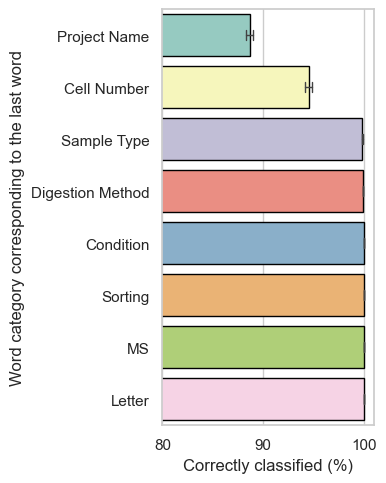

In [776]:
sum_stats['last_word']  = sum_stats['Parameters'].apply(lambda x: [i for i in x][-1])

last_hm = sum_stats.groupby(['last_word']).agg({'correct (%)':('count', 'mean', 'std')})
last_hm.columns = ['count', 'mean', 'std']

last_hm = last_hm[last_hm['count'] >2].reset_index()
last_hm
sns.set_style('whitegrid')
sns.set_context('notebook')
#plt.figure(figsize=(10, 20))
sns.catplot(sum_stats[sum_stats.last_word.isin(name_dict.keys())], 
            y='last_word', x='correct (%)', kind='bar', aspect=0.8,
           errorbar='ci', edgecolor='k', palette='Set3', capsize=0.2, errwidth=1
           ).set(xlim=(80, 101),
    xlabel='Correctly classified (%)', ylabel='Word category corresponding to the last word')
sns.despine(top=False, right=False)

plt.savefig('name_accu.svg', bbox_inches='tight')

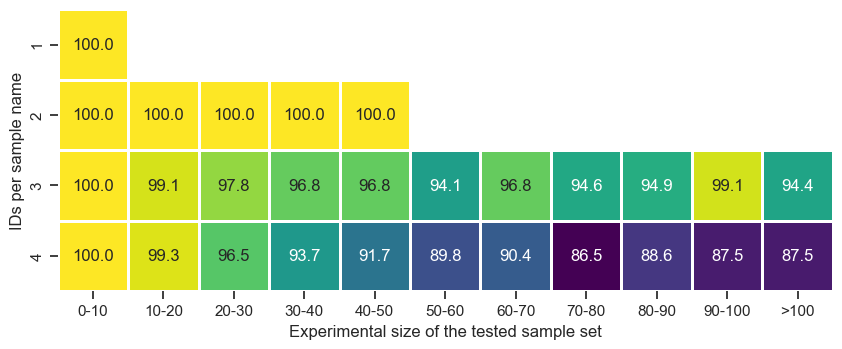

In [775]:
sum_stats_hm= sum_stats.groupby(['n_group', 'N_parameters']).agg({'correct (%)':('count', 'mean', 'std')}).reset_index()
sum_stats_hm.columns = ['n_group', 'n_parameters', 'count', 'mean', 'std']

sns.set_style('ticks')
sns.set_context('notebook')

plt.figure(figsize=(10, 20))
sns.heatmap(sum_stats_hm.pivot_table(index='n_parameters', columns='n_group', values='mean'),
           cmap='viridis', square=True, lw=1, linecolor='w',
            annot=True, fmt='.1f', cbar=False).set(xlabel='Experimental size of the tested sample set', ylabel='IDs per sample name')

plt.savefig('size_accu.svg', bbox_inches='tight')